In [23]:

import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error 

In [24]:
sys.path.insert(1, '/home/ujwal/ML_program/Trading_financial_market/Predicting_AUDUSD_Using_Major_Regression_Models')

from ipynb.fs.defs.Data_preprocessing import sampling_1target

n_steps = 60

train_X, train_Y, val_X, val_Y, test_X, test_Y,   = sampling_1target(n_steps)


In [25]:
train_X.shape

(92474, 60)

In [26]:
train_Y.shape

(92474,)

In [27]:
import numpy as np
CBModel = CatBoostRegressor()
CBModel.fit(train_X,train_Y , verbose=False)

#test data
preds = CBModel.predict(test_X)
MAE_t = mean_absolute_error(test_Y, preds)

#val data
preds_val = CBModel.predict(val_X)
MAE_v = mean_absolute_error(val_Y, preds_val)

print(MAE_t, MAE_v)

0.0009046324183300965 0.0018948542293171066


In [28]:

def return_score(param):
    CBModel = CatBoostRegressor(**param)  
    CBModel.fit(X=train_X, y=train_Y, eval_set=[(val_X,val_Y)], early_stopping_rounds=100)
    preds = CBModel.predict(val_X)
    mae = mean_absolute_error(val_Y, preds)
    return mae


In [29]:
param={}
a = return_score(param)
a

Learning rate set to 0.103648
0:	learn: 0.1063106	test: 0.1615936	best: 0.1615936 (0)	total: 17.5ms	remaining: 17.5s
1:	learn: 0.0956557	test: 0.1459712	best: 0.1459712 (1)	total: 33.8ms	remaining: 16.9s
2:	learn: 0.0861299	test: 0.1312172	best: 0.1312172 (2)	total: 54.4ms	remaining: 18.1s
3:	learn: 0.0775161	test: 0.1189255	best: 0.1189255 (3)	total: 70.8ms	remaining: 17.6s
4:	learn: 0.0698064	test: 0.1076455	best: 0.1076455 (4)	total: 89.5ms	remaining: 17.8s
5:	learn: 0.0628657	test: 0.0972551	best: 0.0972551 (5)	total: 107ms	remaining: 17.8s
6:	learn: 0.0566593	test: 0.0876296	best: 0.0876296 (6)	total: 131ms	remaining: 18.6s
7:	learn: 0.0510637	test: 0.0794665	best: 0.0794665 (7)	total: 153ms	remaining: 19s
8:	learn: 0.0460314	test: 0.0715155	best: 0.0715155 (8)	total: 171ms	remaining: 18.8s
9:	learn: 0.0415464	test: 0.0644659	best: 0.0644659 (9)	total: 189ms	remaining: 18.7s
10:	learn: 0.0374938	test: 0.0584411	best: 0.0584411 (10)	total: 210ms	remaining: 18.9s
11:	learn: 0.033832

0.0018926813371540083

In [30]:
CBModel.get_params()

{'loss_function': 'RMSE'}

In [34]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [35]:
import optuna
from sklearn.metrics import mean_absolute_error 
import numpy as np
import pandas as pd

def objective(trial):
    param = {}
    param['depth'] = trial.suggest_int('depth', 9, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = 10000
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['random_state'] = 1
    param['logging_level'] = 'Silent'

    return(return_score(param)) # this will return the mae score

    


In [37]:
study = optuna.create_study(storage=None, direction='minimize',sampler=TPESampler(seed=1))
study.optimize(objective, n_trials=30, show_progress_bar = True, n_jobs=-1)

[I 2022-12-04 14:11:23,351] A new study created in memory with name: no-name-f2510750-f042-40be-a75f-c4e28eef7995
/home/ujwal/anaconda3/lib/python3.9/site-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/30 [00:00<?, ?it/s]

/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:23:06,622] Trial 5 finished with value: 0.0018722496874019432 and parameters: {'depth': 10, 'l2_leaf_reg': 4.5, 'min_child_samples': 8}. Best is trial 5 with value: 0.0018722496874019432.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:25:01,052] Trial 2 finished with value: 0.0018741439148530377 and parameters: {'depth': 10, 'l2_leaf_reg': 5.5, 'min_child_samples': 8}. Best is trial 5 with value: 0.0018722496874019432.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:25:49,722] Trial 6 finished with value: 0.0018876910910161776 and parameters: {'depth': 12, 'l2_leaf_reg': 2.5, 'min_child_samples': 16}. Best is trial 5 with value: 0.0018722496874019432.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:28:44,330] Trial 7 finished with value: 0.0018657067263473644 and parameters: {'depth': 15, 'l2_leaf_reg': 3.0, 'min_child_samples': 16}. Best is trial 7 with value: 0.0018657067263473644.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:35:52,933] Trial 10 finished with value: 0.0018682481273767657 and parameters: {'depth': 9, 'l2_leaf_reg': 1.5, 'min_child_samples': 32}. Best is trial 7 with value: 0.0018657067263473644.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:37:38,154] Trial 8 finished with value: 0.001870913442827488 and parameters: {'depth': 13, 'l2_leaf_reg': 1.0, 'min_child_samples': 32}. Best is trial 7 with value: 0.0018657067263473644.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:38:30,948] Trial 1 finished with value: 0.0018694467355697079 and parameters: {'depth': 14, 'l2_leaf_reg': 4.5, 'min_child_samples': 4}. Best is trial 7 with value: 0.0018657067263473644.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:39:39,084] Trial 3 finished with value: 0.0018756791001458251 and parameters: {'depth': 12, 'l2_leaf_reg': 2.0, 'min_child_samples': 1}. Best is trial 7 with value: 0.0018657067263473644.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:44:45,743] Trial 9 finished with value: 0.001860107960243666 and parameters: {'depth': 15, 'l2_leaf_reg': 5.0, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:44:57,366] Trial 11 finished with value: 0.001877491202140499 and parameters: {'depth': 13, 'l2_leaf_reg': 4.5, 'min_child_samples': 32}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:45:45,766] Trial 13 finished with value: 0.0018910995687969395 and parameters: {'depth': 10, 'l2_leaf_reg': 2.0, 'min_child_samples': 32}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:52:02,218] Trial 15 finished with value: 0.0018717823587029857 and parameters: {'depth': 11, 'l2_leaf_reg': 2.5, 'min_child_samples': 4}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:53:11,871] Trial 14 finished with value: 0.0018715155298604836 and parameters: {'depth': 10, 'l2_leaf_reg': 5.5, 'min_child_samples': 4}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:54:42,440] Trial 12 finished with value: 0.0018728484776843522 and parameters: {'depth': 14, 'l2_leaf_reg': 1.0, 'min_child_samples': 8}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:55:56,382] Trial 16 finished with value: 0.0018976285216691555 and parameters: {'depth': 9, 'l2_leaf_reg': 4.0, 'min_child_samples': 1}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 14:57:39,862] Trial 0 finished with value: 0.00187164626024042 and parameters: {'depth': 14, 'l2_leaf_reg': 3.5, 'min_child_samples': 1}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 15:02:07,486] Trial 18 finished with value: 0.0018674834459034976 and parameters: {'depth': 15, 'l2_leaf_reg': 3.5, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 15:04:09,916] Trial 4 finished with value: 0.0018849370178103757 and parameters: {'depth': 15, 'l2_leaf_reg': 2.5, 'min_child_samples': 1}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 15:04:14,874] Trial 17 finished with value: 0.00187372468350144 and parameters: {'depth': 15, 'l2_leaf_reg': 5.5, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 15:07:43,651] Trial 19 finished with value: 0.0018674834459034976 and parameters: {'depth': 15, 'l2_leaf_reg': 3.5, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 15:09:08,667] Trial 20 finished with value: 0.0018674834459034976 and parameters: {'depth': 15, 'l2_leaf_reg': 3.5, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 15:10:50,983] Trial 21 finished with value: 0.0018674834459034976 and parameters: {'depth': 15, 'l2_leaf_reg': 3.5, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.


/tmp/ipykernel_57866/137214979.py:9: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)


[I 2022-12-04 15:12:14,081] Trial 22 finished with value: 0.0018674834459034976 and parameters: {'depth': 15, 'l2_leaf_reg': 3.5, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.
[I 2022-12-04 15:12:51,561] Trial 23 finished with value: 0.0018657067263473644 and parameters: {'depth': 15, 'l2_leaf_reg': 3.0, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.
[I 2022-12-04 15:15:58,196] Trial 24 finished with value: 0.0018657067263473644 and parameters: {'depth': 15, 'l2_leaf_reg': 3.0, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.
[I 2022-12-04 15:17:23,738] Trial 25 finished with value: 0.0018657067263473644 and parameters: {'depth': 15, 'l2_leaf_reg': 3.0, 'min_child_samples': 16}. Best is trial 9 with value: 0.001860107960243666.
[I 2022-12-04 15:18:01,230] Trial 26 finished with value: 0.0018673341752759793 and parameters: {'depth': 13, 'l2_leaf_reg': 3.0, 'min_child_samples': 16}. Best is trial 9 with

In [38]:
tune_params = study.best_params
tune_params

{'depth': 15, 'l2_leaf_reg': 5.0, 'min_child_samples': 16}

In [41]:
params = {}
result = return_score(params)
tune_result = return_score(study.best_params)

Learning rate set to 0.103648
0:	learn: 0.1063106	test: 0.1615936	best: 0.1615936 (0)	total: 41.4ms	remaining: 41.3s
1:	learn: 0.0956557	test: 0.1459712	best: 0.1459712 (1)	total: 65.7ms	remaining: 32.8s
2:	learn: 0.0861299	test: 0.1312172	best: 0.1312172 (2)	total: 90.6ms	remaining: 30.1s
3:	learn: 0.0775161	test: 0.1189255	best: 0.1189255 (3)	total: 112ms	remaining: 27.8s
4:	learn: 0.0698064	test: 0.1076455	best: 0.1076455 (4)	total: 129ms	remaining: 25.7s
5:	learn: 0.0628657	test: 0.0972551	best: 0.0972551 (5)	total: 146ms	remaining: 24.2s
6:	learn: 0.0566593	test: 0.0876296	best: 0.0876296 (6)	total: 164ms	remaining: 23.2s
7:	learn: 0.0510637	test: 0.0794665	best: 0.0794665 (7)	total: 189ms	remaining: 23.4s
8:	learn: 0.0460314	test: 0.0715155	best: 0.0715155 (8)	total: 212ms	remaining: 23.4s
9:	learn: 0.0415464	test: 0.0644659	best: 0.0644659 (9)	total: 229ms	remaining: 22.7s
10:	learn: 0.0374938	test: 0.0584411	best: 0.0584411 (10)	total: 245ms	remaining: 22.1s
11:	learn: 0.033832

In [42]:
print(f"without tuning {result}")
print(f"with tuning {tune_result}")

without tuning 0.0018926813371540083
with tuning 0.0019389592120842372


#### This model has feature to tune its learning rate and the defoult value normally give a good result, So there is no need to manually tune it but I wanted to check.
#### In the end victory goes to self-tuned catboostregressor.

In [47]:
CBModel = CatBoostRegressor()
CBModel.fit(X=train_X, y=train_Y, eval_set=[(val_X,val_Y)], early_stopping_rounds=100)
preds = CBModel.predict(test_X)
mae = mean_absolute_error(test_Y, preds)
mae

Learning rate set to 0.103648
0:	learn: 0.1063106	test: 0.1615936	best: 0.1615936 (0)	total: 16.3ms	remaining: 16.3s
1:	learn: 0.0956557	test: 0.1459712	best: 0.1459712 (1)	total: 36.9ms	remaining: 18.4s
2:	learn: 0.0861299	test: 0.1312172	best: 0.1312172 (2)	total: 52.5ms	remaining: 17.4s
3:	learn: 0.0775161	test: 0.1189255	best: 0.1189255 (3)	total: 69.5ms	remaining: 17.3s
4:	learn: 0.0698064	test: 0.1076455	best: 0.1076455 (4)	total: 87ms	remaining: 17.3s
5:	learn: 0.0628657	test: 0.0972551	best: 0.0972551 (5)	total: 104ms	remaining: 17.2s
6:	learn: 0.0566593	test: 0.0876296	best: 0.0876296 (6)	total: 122ms	remaining: 17.3s
7:	learn: 0.0510637	test: 0.0794665	best: 0.0794665 (7)	total: 142ms	remaining: 17.6s
8:	learn: 0.0460314	test: 0.0715155	best: 0.0715155 (8)	total: 159ms	remaining: 17.5s
9:	learn: 0.0415464	test: 0.0644659	best: 0.0644659 (9)	total: 176ms	remaining: 17.4s
10:	learn: 0.0374938	test: 0.0584411	best: 0.0584411 (10)	total: 193ms	remaining: 17.4s
11:	learn: 0.033832

0.0008861525553527929

Text(0, 0.5, 'Predicted Y')

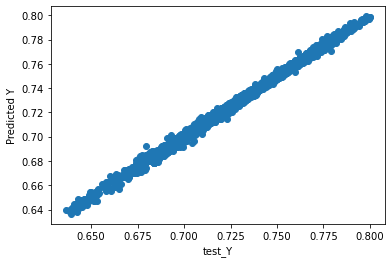

In [48]:
import matplotlib.pyplot as plt
plt.scatter(test_Y,preds)
plt.xlabel('test_Y')
plt.ylabel('Predicted Y')

In [50]:
# Check mse using Linear regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(test_Y,preds))
print('MSE :'," ", metrics.mean_squared_error(test_Y,preds))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(test_Y,preds)))

MAE :   0.0008861525553527929
MSE :   1.5023548180142662e-06
RMSE :   0.0012257058448152502


/home/ujwal/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

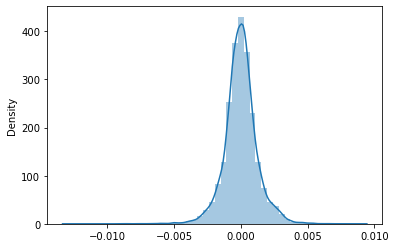

In [52]:
sns.distplot(test_Y - preds, bins=50)

In [53]:
# save model using pickle
import pickle
pickle.dump(CBModel, open('CatBoostRegressor.pkl', 'wb'))

In [60]:
# loading model
import pickle

CatBoostRegressor = pickle.load(open('CatBoostRegressor.pkl', 'rb'))

In [61]:
x = test_X[-1].reshape(1,-1)
x

array([[0.64863, 0.64618, 0.64753, 0.64738, 0.64883, 0.64797, 0.64678,
        0.64743, 0.64954, 0.64985, 0.64988, 0.65018, 0.65078, 0.65067,
        0.64961, 0.64955, 0.64838, 0.64807, 0.65003, 0.64844, 0.65015,
        0.65133, 0.64911, 0.64708, 0.64639, 0.64758, 0.64784, 0.64281,
        0.64353, 0.64299, 0.64193, 0.64071, 0.63957, 0.64023, 0.64023,
        0.64023, 0.64023, 0.64023, 0.64023, 0.64023, 0.64023, 0.64023,
        0.64023, 0.64023, 0.64023, 0.64023, 0.64023, 0.64023, 0.64023,
        0.64023, 0.64023, 0.64023, 0.64023, 0.64023, 0.64023, 0.64023,
        0.64023, 0.64023, 0.64023, 0.64023]])

In [64]:
# 10 day future prediction
x = test_X[-1].reshape(1,-1)
forecast = []

for i in range(10):
    forc = CatBoostRegressor.predict(data=x)
    forecast = np.append(forecast, forc)
    x = np.append(x, forc)
    x = np.delete(x, 0)
    x = x.reshape(1, -1)
    print(x)

forecast

[[0.64618    0.64753    0.64738    0.64883    0.64797    0.64678
  0.64743    0.64954    0.64985    0.64988    0.65018    0.65078
  0.65067    0.64961    0.64955    0.64838    0.64807    0.65003
  0.64844    0.65015    0.65133    0.64911    0.64708    0.64639
  0.64758    0.64784    0.64281    0.64353    0.64299    0.64193
  0.64071    0.63957    0.64023    0.64023    0.64023    0.64023
  0.64023    0.64023    0.64023    0.64023    0.64023    0.64023
  0.64023    0.64023    0.64023    0.64023    0.64023    0.64023
  0.64023    0.64023    0.64023    0.64023    0.64023    0.64023
  0.64023    0.64023    0.64023    0.64023    0.64023    0.63892285]]
[[0.64753    0.64738    0.64883    0.64797    0.64678    0.64743
  0.64954    0.64985    0.64988    0.65018    0.65078    0.65067
  0.64961    0.64955    0.64838    0.64807    0.65003    0.64844
  0.65015    0.65133    0.64911    0.64708    0.64639    0.64758
  0.64784    0.64281    0.64353    0.64299    0.64193    0.64071
  0.63957    0.64023

array([0.63892285, 0.63886398, 0.63886398, 0.6388094 , 0.63882977,
       0.63882977, 0.63884141, 0.63881161, 0.63888349, 0.63894354])

In [65]:
forecast

array([0.63892285, 0.63886398, 0.63886398, 0.6388094 , 0.63882977,
       0.63882977, 0.63884141, 0.63881161, 0.63888349, 0.63894354])